<a href="https://colab.research.google.com/github/Falconwatch/BankingBattle/blob/main/HW_1/HW_1_Optuna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание 1

# Автор: Алина Ермилова

В этой домашней работе Вы сможете попрактиваться в применении фреймворка для подбора гиперпараметров [Optuna](https://optuna.org/) для одной из наиболее популярных вариаций градиентного бустинга [XGBoost](https://xgboost.readthedocs.io/en/stable/python/index.html).

Это домашнее задание состоит из **4х заданий**, **максимальная** сумма за выполнение которых составляет **25 баллов**. Однако, **3 лучших решения** получат дополнительно **+5 бонусных баллов**.

In [1]:
# установка необходимых библиотек
!pip install -q optuna optuna-dashboard xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.2/90.2 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 6.3 MB/s eta 0:00:00


# Задание 1. [5 баллов]

Возьмите выборку на Ваше усмотрение и сделайте ее быстрый анализ, постройте первый вариант модели.

Примеры анализа и построения модели:
* [Предсказание стоимости автомобилей](https://www.kaggle.com/code/niteshyadav3103/car-price-eda-and-modelling). Пример jupyter-ноутбука с детальным анализом данных, разбиением выборки на обучающую и тестовую и построением нескольких классических моделей.
* [Апельсины и грейпфруты](https://www.kaggle.com/code/mahmoudmagdy07/oranges-vs-grapefruit-team-20). Пример jupyter-ноутбука с детальным анализом данных, разбиением выборки на обучающую и тестовую и использованием "Наивного Байеса" и нейросетей.


In [3]:
!wget -q https://raw.githubusercontent.com/Falconwatch/SberUni-ChooseMLModel/main/HW_1/citrus.csv

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Чтение данных и информация о них

In [81]:
data = pd.read_csv("citrus.csv")
data = pd.DataFrame(data)

features = data.columns[1:]
target_str = 'name'

In [6]:
data.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


## Корреляция

<Axes: >

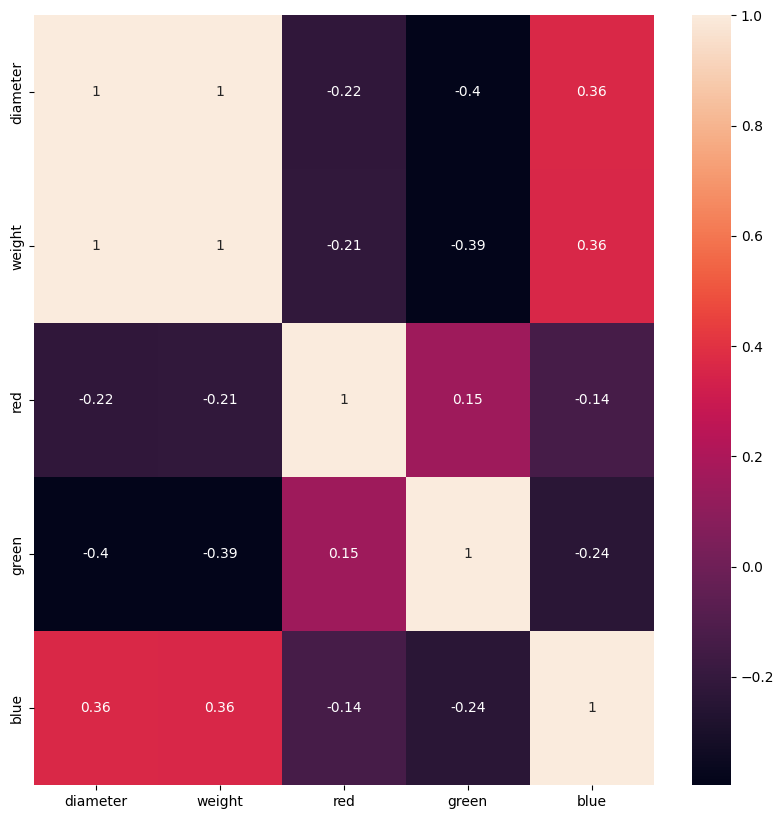

In [67]:
# correlation between features using pearson's correlation coefficient
cor = data[features].corr(method = 'pearson')
plt.figure(figsize = (10,10))
sns.heatmap(cor, annot=True)

## Распределения по классам

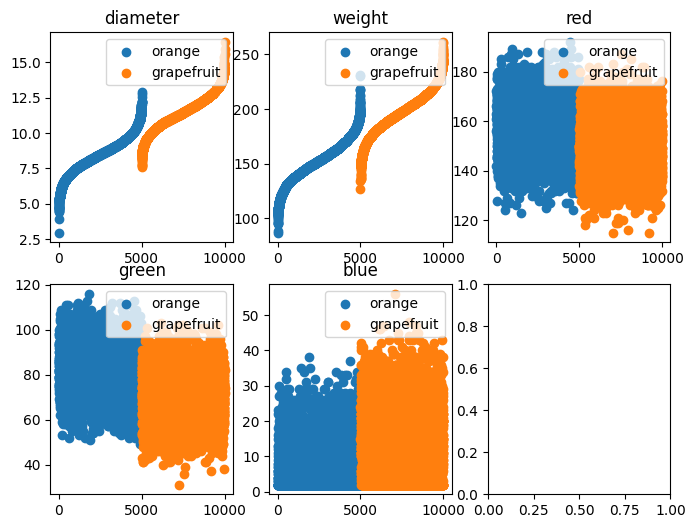

In [82]:
def plot_scatter(ax, df, col, splitter="name"):
  unique_names = df[splitter].unique()
  for un in unique_names:
    un_data = df.loc[df[splitter]==un]
    ax.scatter(un_data.index, un_data[col], label=un)
  ax.legend(loc="upper right")
  #ax.title(col)
  ax.set_title(col)

fig, axs = plt.subplots(2, 3, figsize=(8, 6))
for i,c in enumerate(features):
  m = i%3
  n = i//3
  plot_scatter(axs[n, m], data, c, splitter=target_str)

## Парные распределения

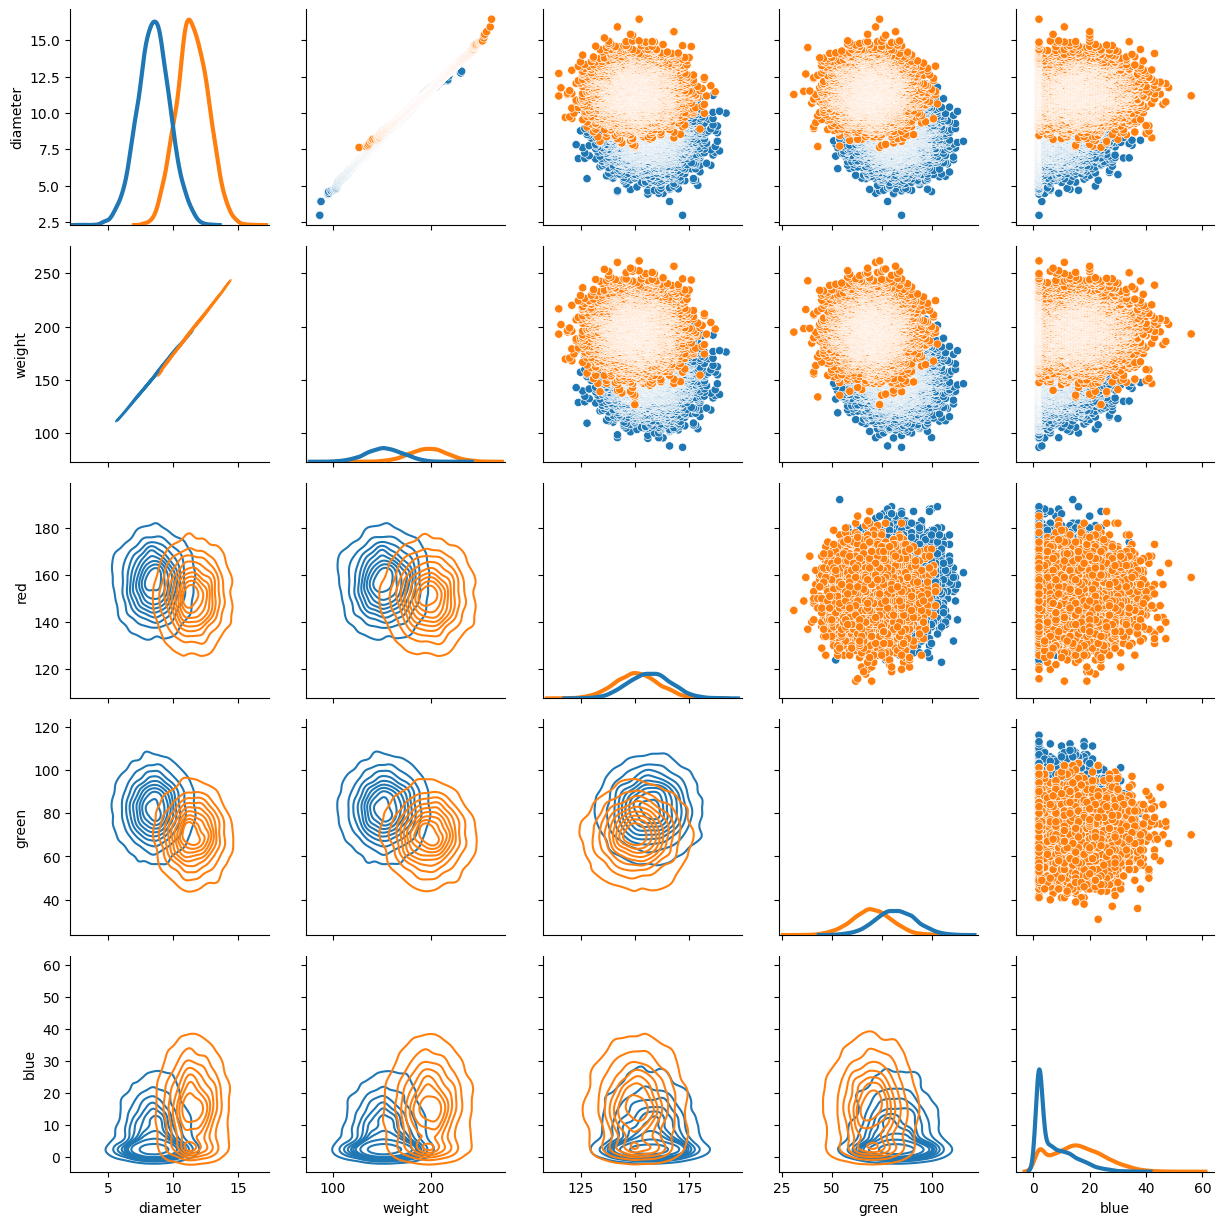

In [49]:
g = sns.PairGrid(data, hue=target_str)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)

## Бейзлайн-модель

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [84]:
#для удобства конвертну имена в классы
target_map = {"orange":0,
              "grapefruit":1}
target = "class"
data[target] = data[target_str].map(target_map)

In [85]:
clf = RandomForestClassifier()
clf.fit(X=data[features], y=data[target])
print(classification_report(y_true=data[target],
                            y_pred=clf.predict(X = data[features])))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5000
           1       1.00      1.00      1.00      5000

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



# 2. Задание 2 [5 баллов]
Разбейте выборку на обучение и контроль. Вам может понадобится [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [88]:
train, test = train_test_split(data, test_size=0.3, stratify=data[target])
print("Train size {0}, target rate {1}".format(train.shape, train[target].mean()))
print("Test size {0}, target rate {1}".format(test.shape, test[target].mean()))

Train size (7000, 7), target rate 0.5
Test size (3000, 7), target rate 0.5


In [109]:
clf2 = RandomForestClassifier()
clf2.fit(X=train[features], y=train[target])
baseline_test_gini = roc_auc_score(y_true = test[target],
              y_score = clf2.predict_proba(test[features])[:, 1])*2-1
print("gini: ", baseline_test_gini)
print(classification_report(y_true=test[target],
                            y_pred=clf2.predict(X = test[features])))


gini:  0.9803475555555554
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1500
           1       0.95      0.96      0.95      1500

    accuracy                           0.95      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.95      0.95      0.95      3000



# Задание 3. [10 баллов]

Проведите для данной выборки подбор гиперпараметров для модели `XGBoost` с помощью `Optuna`. Варьируйте **не менее 5** гиперпараметров.


In [90]:
import numpy as np
import optuna
import xgboost as xgb


In [93]:
def objective(trial):

    train_x, valid_x, train_y, valid_y = train[features], test[features], train[target], test[target]
    dtrain = xgb.DMatrix(train_x, label=train_y)
    dvalid = xgb.DMatrix(valid_x, label=valid_y)

    param = {
        "verbosity": 0,
        "objective": "binary:logistic",
        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
    }

    if param["booster"] in ["gbtree", "dart"]:
        # maximum depth of the tree, signifies complexity of the tree.
        param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
        # minimum child weight, larger the term more conservative the tree.
        param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        # defines how selective algorithm is.
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    bst = xgb.train(param, dtrain)
    preds = bst.predict(dvalid)
    #pred_labels = np.rint(preds)
    gini = roc_auc_score(y_true= valid_y, y_score= preds)*2 - 1
    #accuracy = sklearn.metrics.accuracy_score(valid_y, pred_labels)
    return gini

In [94]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, timeout=600)

[I 2023-07-16 20:11:49,118] A new study created in memory with name: no-name-59929356-3e84-4979-9954-58fb1ee9d78d
[I 2023-07-16 20:11:49,310] Trial 0 finished with value: 0.9443173333333335 and parameters: {'booster': 'dart', 'lambda': 0.12814145179409697, 'alpha': 3.309986356251965e-06, 'subsample': 0.7679915883377484, 'colsample_bytree': 0.2965299496220096, 'max_depth': 7, 'min_child_weight': 9, 'eta': 3.273643883640878e-05, 'gamma': 0.2576493572189596, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 3.580827957462033e-06, 'skip_drop': 0.00014346001470362868}. Best is trial 0 with value: 0.9443173333333335.
[I 2023-07-16 20:11:49,423] Trial 1 finished with value: 0.9503208888888888 and parameters: {'booster': 'gbtree', 'lambda': 0.098646383241756, 'alpha': 1.1986837664060433e-08, 'subsample': 0.41138324418859523, 'colsample_bytree': 0.41768655600120486, 'max_depth': 3, 'min_child_weight': 6, 'eta': 5.362616098537293e-06, 'gamma': 7.41133

In [95]:
study.best_params

{'booster': 'dart',
 'lambda': 1.055691026210735e-06,
 'alpha': 2.727946611617436e-07,
 'subsample': 0.5081385198714261,
 'colsample_bytree': 0.4793316536367534,
 'max_depth': 9,
 'min_child_weight': 3,
 'eta': 9.345438115960142e-08,
 'gamma': 0.13386128130297423,
 'grow_policy': 'lossguide',
 'sample_type': 'weighted',
 'normalize_type': 'forest',
 'rate_drop': 2.452231676617543e-07,
 'skip_drop': 0.014996765573086374}

# Задание 4. [5 баллов]

Проанализируйте результаты -- на сколько улучшилось качество модели с учетом Вашего разбиения.

In [98]:
trials = study.trials_dataframe()

In [115]:
trials["value"].max() - baseline_test_gini

0.001384000000000274

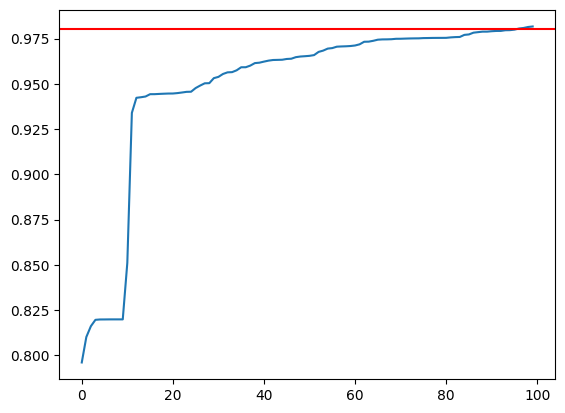

In [126]:
plt.plot(sorted(trials["value"].values))
plt.axhline(y=baseline_test_gini, color='r', linestyle='-')